# BN-Notears

In [14]:
import pickle
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Open the pickle file for reading
with open('organized_training_memory.pkl', 'rb') as f:
    loaded_data = pickle.load(f)
loaded_data


,cart_position,cart_velocity,pole_angle,pole_angular_velocity,action,reward,new_cart_position,new_cart_velocity,new_pole_angle,new_pole_angular_velocity
0,0.000133,0.044334,-0.040978,-0.013006,0,1.0,0.001020,-0.150177,-0.041238,0.266472
1,0.001020,-0.150177,-0.041238,0.266472,0,1.0,-0.001984,-0.344687,-0.035909,0.545868
2,-0.001984,-0.344687,-0.035909,0.545868,0,1.0,-0.008877,-0.539287,-0.024991,0.827024
3,-0.008877,-0.539287,-0.024991,0.827024,0,1.0,-0.019663,-0.734058,-0.008451,1.111744
4,-0.019663,-0.734058,-0.008451,1.111744,0,1.0,-0.034344,-0.929068,0.013784,1.401764
...,...,...,...,...,...,...,...,...,...,...
10008,2.238958,1.797743,0.148956,0.326994,1,1.0,2.274913,1.990466,0.155496,0.084743
10009,2.274913,1.990466,0.155496,0.084743,1,1.0,2.314722,2.183056,0.157191,-0.155126
10010,2.314722,2.183056,0.157191,-0.155126,0,1.0,2.358383,1.986074,0.154089,0.182729
10011,2.358383,1.986074,0.154089,0.182729,1,1.0,2.398105,2.178694,0.157743,-0.057655


In [5]:
loaded_data.shape

(10013, 10)

### Tranform to csv

In [8]:
loaded_data.to_csv('notears_data.csv', index=False, header=False)

### Notears

In [9]:
!notears_linear notears_data.csv

In [69]:
W = pd.read_csv('W_est.csv', header = None)
W.columns = loaded_data.columns
W = W.round(5)

In [70]:
W

,cart_position,cart_velocity,pole_angle,pole_angular_velocity,action,reward,new_cart_position,new_cart_velocity,new_pole_angle,new_pole_angular_velocity
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.81991,0.00000,0.0,0.0
1,0.33205,0.0,0.0,0.0,0.0,0.0,0.00000,0.74381,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0
5,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0
6,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0
7,0.36032,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0
8,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0
9,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0


In [71]:
node_names_dict = {index: column_name for index, column_name in enumerate(W.columns)}
node_names_dict

{0: 'cart_position',
 1: 'cart_velocity',
 2: 'pole_angle',
 3: 'pole_angular_velocity',
 4: 'action',
 5: 'reward',
 6: 'new_cart_position',
 7: 'new_cart_velocity',
 8: 'new_pole_angle',
 9: 'new_pole_angular_velocity'}

In [72]:
# Create a directed graph (DiGraph)
G = nx.DiGraph()

# Add weighted edges based on the adjacency matrix
for row in range(W.shape[0]):
    for col in range(W.shape[1]):
        weight = W.iloc[row, col]
        if weight > 0:
            G.add_edge(row, col, weight=weight)


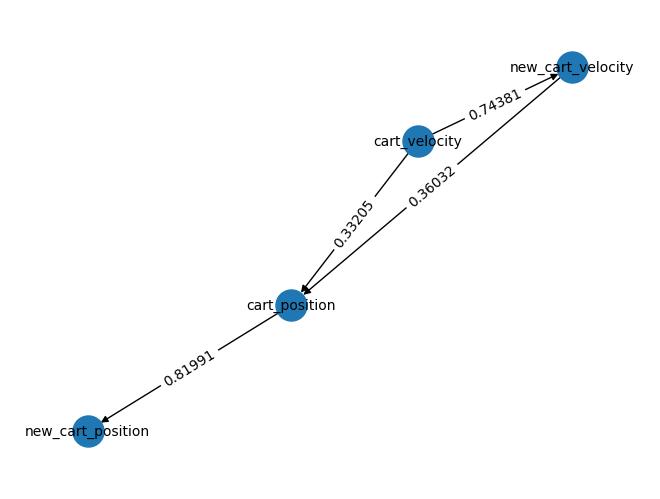

In [75]:
# Draw the graph
H = nx.relabel_nodes(G, node_names_dict)
pos = nx.spring_layout(H)  # Layout for visualization
edge_labels = {(u, v): d['weight'] for u, v, d in H.edges(data=True)}

# Draw the graph with custom node labels
nx.draw(H, pos, node_size=500, font_size=10, with_labels=True)

# Draw edge labels
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)

plt.margins(0.1) 
plt.show()